# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


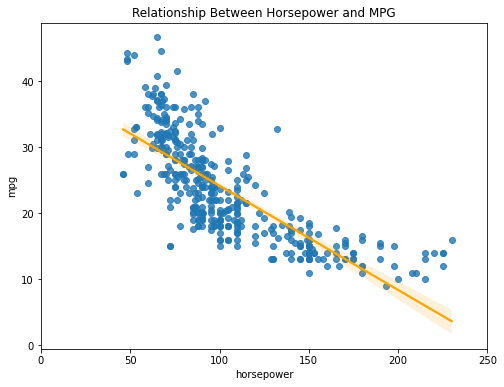

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
call_on_students(1)

['Tristan']


#### Answer: 

- where the slope gives us the minimized loss (SSE = RSS)


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
call_on_students(1)

['Gavin']


### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
call_on_students(1)

['Heath']


#### Answer: 

- learning rate takes a proportion of the step.


If learning rate is too large: won't converge on answer
    
If learning rate is too small: takes a long time

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
call_on_students(1)

['Danayt']


#### Answer: 

- target: class (0,1,2...)

- predictions: the class (0,1,2...)

- diff from linear - linear predicts a continuous output, logistic is a class

- model type: (parameter = Betas) yes, it is parametric.

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
call_on_students(1)

['Andrew']


#### Answer: 

- 


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
call_on_students(1)

['Irwin']


In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop('target', axis=1)
y = mpg_class.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.33, stratify=y)


In [15]:
# Scale the data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
call_on_students(1)

['Kendall']


In [18]:
y_train

34     1
137    1
72     1
161    0
276    0
      ..
292    0
140    0
202    0
335    0
345    0
Name: target, Length: 262, dtype: int64

#### Part 1: explore the target column breakdown in train data

In [19]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.748092
1    0.251908
Name: target, dtype: float64

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- .74% accuracy


#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer


#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [31]:
call_on_students(1)

['Andrew']


#### Answer:

- Issue: imbalanced target

Solutions
1. SMOTE
2. under sampling majority class (not enough data)
3. bootstrapping 
4. TTS - stratify on target


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [45]:
call_on_students(1)

['Tristan']


In [20]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42).fit(X_train_sc, y_train)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, logreg.predict(X_test_sc) )

In [23]:
cm

array([[94,  3],
       [ 7, 26]], dtype=int64)

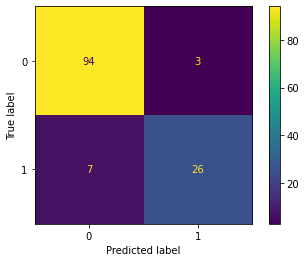

In [24]:



plot_confusion_matrix(logreg, X_test_sc, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [25]:
# call_on_students(1)

In [26]:
# Accuracy
accuracy_score(y_test, logreg.predict(X_test_sc))

0.9230769230769231

In [27]:
# Precision
precision_score(y_test, logreg.predict(X_test_sc))

0.896551724137931

In [28]:
# Recall
recall_score(y_test, logreg.predict(X_test_sc))

0.7878787878787878

In [29]:
f1_score(y_test, logreg.predict(X_test_sc))# F1-Score


0.8387096774193549

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg.predict(X_test_sc)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        97
           1       0.90      0.79      0.84        33

    accuracy                           0.92       130
   macro avg       0.91      0.88      0.89       130
weighted avg       0.92      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [31]:
call_on_students(1)

['KC']


In [32]:
# Calculate roc-auc

roc_auc_score(y_test, logreg.decision_function(X_test_sc))

0.9734457981880662

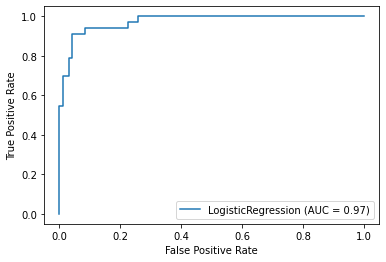

In [67]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_sc, y_test)

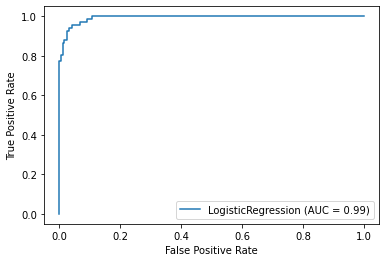

In [69]:
plot_roc_curve(logreg, X_train_sc, y_train)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [68]:
call_on_students(1)

['Nick']


#### Answer:

- great!


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [ ]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

In [ ]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

In [ ]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [ ]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = None

In [ ]:
# Plot a confusion matrix on the test data


In [ ]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- 
